# Climbing Data With `pandas` Tutorial

In [1]:
%matplotlib notebook

## Import

- Need `pandas` for data analysis and `sqlite3` for sql connection to read the data
- `sqlite3` is a standard package with Python
- `pandas` is not a standard package and needs to be installed with `pip`

In [2]:
import pandas as pd
import sqlite3

## Path To Data

- Make sure to download the data from https://www.kaggle.com/dcohen21/8anu-climbing-logbook
- A kaggle account is necessary to do this
- Put the `database.sqlite` file in the `/data` folder

In [3]:
path_data = r'data/database.sqlite'

## SQL Connection

- The following code creates an SQL connection to the `sqlite3` database

In [4]:
# Create connection to the sqlite3 database
connection = sqlite3.connect(path_data)

## Exploring with `sqlite3`

- Normally we would not do much exploration with `sqlite3` itself, we would use `pandas` directly
- However, we will do a simple exploration with `sqlite3` to find out what table names are available in the `sqlite3` database
- To do this, we create a cursor through our connection, using this cursor we can run SQL queries as shown below
- As you can see below, it is a bit cumbersome

In [5]:
# Create a cursor to execute our queries to the database
cursor = connection.cursor()

In [6]:
# Get tables which are in the database and make a list of their names
tables = cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

table_names = []
for table in tables:
    table_names.append(table[0])

print(table_names)

['user', 'method', 'grade', 'ascent']


## Tables

- We can see from above there are four tables:
    1. `user`
    1. `method`
    1. `grade`
    1. `ascent`
- This is a good start but now we want to load the tables into `pandas` and start exploring

## Reading Into `pandas`

- `pandas` has a lot of different ways to read data into a `pd.DataFrame` through `pd.read_<...>`
- We are interested in using `pd.read_sql`
- The two important parameters we need to provide are:
    - `sql`: This is the SQL query
    - `con`: This is the connection to the sql database
- We use the following code to read the full tables into dataframes
- Note that the first line of code in the cell below with `%%time` is not Python code but something specific to `jupyter notebook` which just allows us to check the time it took to run the cell

In [7]:
%%time
# This may take a couple minutes to run
df_user = pd.read_sql(sql='SELECT * FROM user', con=connection)
df_method = pd.read_sql(sql='SELECT * FROM method', con=connection)
df_grade = pd.read_sql(sql='SELECT * FROM grade', con=connection)
df_ascent = pd.read_sql(sql='SELECT * FROM ascent', con=connection)

Wall time: 1min 7s


## Exercises

- At this point do the exercises up till "3. Read Into `pandas`"

## Exploring With `pandas`

- At this point we have loaded all the tables into memory, this is not always possible, especially of the database is huge but in this case
- Now we have all four tables in memory, let us do some exploration

### Viewing `DataFrame` Summary

- Just by displaying a `DataFrame` shown in the below cell, we can get a summary view
- This normally shows the first 5 and last 5 rows if the `DataFrame` is large otherwise it will show the whole table
- Similarly with columns, it will only show firs 10 and last 10 columns if large

In [8]:
df_user

,id,first_name,last_name,city,country,sex,height,weight,started,competitions,...,sponsor2,sponsor3,best_area,worst_area,guide_area,interests,birth,presentation,deactivated,anonymous
0,1,first,last,Göteborg,SWE,0,177,73,1996,,...,,,"Railay beach, Krabi, Thailand",None,,,1976-03-10,,0,0
1,2,first,last,stockholm,SWE,0,0,0,2000,,...,,,,,,,None,,0,0
2,3,first,last,Umeå,SWE,0,180,78,1995,,...,,,Hell,Umeå,,,1973-09-09,,0,0
3,4,first,last,Goteborg,SWE,1,165,58,2001,,...,,,,None,,,1984-07-26,,0,0
4,5,first,last,North Attleboro,USA,0,0,0,1991,,...,,,,None,,,1969-05-07,,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62588,67021,first,last,Oreña,ESP,0,180,78,0,,...,,,,None,,,1991-01-05,,0,0
62589,67022,first,last,Paris,FRA,0,185,68,2016,,...,,,,None,,,1989-05-18,,0,0
62590,67023,first,last,Cody,USA,0,190,88,2001,,...,,,,None,,,1986-07-10,,0,0
62591,67024,first,last,Kraków,POL,1,0,0,0,None,...,None,None,None,None,None,None,None,None,0,0


### Further `DataFrame` Exploration

- The goal now is to understand each dataframe, what is contained within each one
- We want to know all the column names
- We want to get summaries of the numeric columns, this is done through `df.describe()` which gives you very useful information such as `count`, `mean`, `min`, `max`, etc
- We want to find the unique values for categorical columns, for this we will use `df['column_name'].value_counts()`

In [9]:
# Print all the column names for the dataframe
df_user.columns

Index(['id', 'first_name', 'last_name', 'city', 'country', 'sex', 'height',
       'weight', 'started', 'competitions', 'occupation', 'sponsor1',
       'sponsor2', 'sponsor3', 'best_area', 'worst_area', 'guide_area',
       'interests', 'birth', 'presentation', 'deactivated', 'anonymous'],
      dtype='object')

In [10]:
# Get summary of all numeric columns
df_user.describe()

,id,sex,height,weight,started,deactivated,anonymous
count,62593.000000,62593.000000,62593.000000,62593.000000,62593.000000,62593.000000,62593.0
mean,33106.406899,0.155145,83.884204,33.121899,1071.687665,0.040899,0.0
std,19373.407787,2.066462,88.155355,35.083605,999.569936,0.198058,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,16325.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,32721.000000,0.000000,0.000000,0.000000,1992.000000,0.000000,0.0
75%,49980.000000,0.000000,176.000000,68.000000,2006.000000,0.000000,0.0
max,67025.000000,255.000000,255.000000,100.000000,2090.000000,1.000000,0.0


- We can see below `df['columns_name'].value_counts()` gives us a lot of information such as:
    - Name of the column
    - Length of the unique values if there are many
    - The count corresponding to each value
- Note that the `df['columns_name'].value_counts()` gives us a `pd.Series` which is essentially a `dict` 
- It looks like the `first_name` and `last_name` columns have been filled with `first` and `last` to anonymisation purposes

In [11]:
# Find all values with counts of first_name column
df_user['first_name'].value_counts()

first    62593
Name: first_name, dtype: int64

In [12]:
# Find all values with counts of last_name column
df_user['last_name'].value_counts()

last    62593
Name: last_name, dtype: int64

In [13]:
# Find all values with counts of city column
df_user['city'].value_counts()

                  1426
Madrid             832
Stockholm          767
Oslo               503
Göteborg           480
                  ... 
Quart                1
Racconigi (CN)       1
Filderstadt          1
Salt                 1
Ningbo               1
Name: city, Length: 16454, dtype: int64

In [14]:
# Find all values with counts of city column
country_count_series = df_user['country'].value_counts()
country_count_series

USA      11861
ESP       6905
DEU       3712
SWE       3629
ITA       3590
         ...  
FLK          1
FRA\n        1
FSM          1
176          1
MCO          1
Name: country, Length: 215, dtype: int64

- We can see that a lot of data is from USA, we could check for the percentage of users using the following
- Unlike stantard Python containers where if we want to do any operations, we have to use a for loop and do them for each element, the `pd.Series` and `pd.DataFrame` have their operations "overloaded" so you can do operations without a forloop
- We also have a lot of functions such as `series.sum()` which are useful for summing over the whole series

In [15]:
country_percentage_series = country_count_series / country_count_series.sum()
country_percentage_series

USA      0.189494
ESP      0.110316
DEU      0.059304
SWE      0.057978
ITA      0.057355
           ...   
FLK      0.000016
FRA\n    0.000016
FSM      0.000016
176      0.000016
MCO      0.000016
Name: country, Length: 215, dtype: float64

- We can find percentage of data from UK doing the following access method (same as `dict`)

In [16]:
country_percentage_series['GBR']

0.04249676481395683

- The following cell is interesting as our guess is 0 represents male which is probably the default, 1 represents female but there is also 255 which may be a mistakes

In [17]:
# Find all values with counts of city column
df_user['sex'].value_counts()

0      53898
1       8691
255        4
Name: sex, dtype: int64

## Exercises

- At this point do the exercises up till "5. Explore All Tables"

## Working With Ascent Data

- After a bit of exploring, we would like to dive deeper into the ascent table, it is the largest table and has the most amount of information in there

In [18]:
display(df_ascent)

display(df_ascent.columns)

,id,user_id,grade_id,notes,raw_notes,method_id,climb_type,total_score,date,year,...,country,comment,rating,description,yellow_id,climb_try,repeat,exclude_from_ranking,user_recommended,chipped
0,2,1,36,,0,3,0,545,918342000,1999,...,THA,Thailand\n,0,,255,0,0,0,0,0
1,3,1,36,,0,3,0,545,925509600,1999,...,,\n,0,,0,0,0,0,0,0
2,4,1,36,,0,3,0,545,933026400,1999,...,SWE,\n,0,,255,0,0,0,0,0
3,5,1,36,,0,3,0,545,933026400,1999,...,SWE,\n,0,,255,0,0,0,0,0
4,6,1,36,,0,3,0,545,933458400,1999,...,,\n,0,,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111872,4910370,59627,46,,0,1,0,650,1505167200,2017,...,POL,"miała być rozgrzewka, a w pełnym słońcu był ca...",2,,255,0,0,0,0,0
4111873,4910371,44075,49,,0,1,0,700,1505080800,2017,...,POL,,0,,255,0,0,0,0,0
4111874,4910376,19098,51,,0,3,0,895,1504994400,2017,...,FRA,"Sobada, al igual que el 7b, 7c i l'altre 7c de...",0,,255,0,0,0,0,0
4111875,4910379,19098,57,,0,3,0,1045,1505080800,2017,...,FRA,"El 7a és guarrillu, però la part de dalt és bo...",2,,255,0,0,0,0,0


Index(['id', 'user_id', 'grade_id', 'notes', 'raw_notes', 'method_id',
       'climb_type', 'total_score', 'date', 'year', 'last_year', 'rec_date',
       'project_ascent_date', 'name', 'crag_id', 'crag', 'sector_id', 'sector',
       'country', 'comment', 'rating', 'description', 'yellow_id', 'climb_try',
       'repeat', 'exclude_from_ranking', 'user_recommended', 'chipped'],
      dtype='object')

- We will be interesting in `user_id`, `grade_id` which when we look at the `grade` table we see is ordered with difficulty, `year` as `date` seems to be changed to be annonymised 
- We can see the number of climb per user as below

In [19]:
df_ascent['user_id'].value_counts()

42086    5541
20095    4892
7505     4579
9171     4570
493      3712
         ... 
36309       1
53482       1
24015       1
21629       1
64469       1
Name: user_id, Length: 36034, dtype: int64

## Exercises

- At this point do the exercise "6. Exploring Ascent Data"

## Filtering Data

- We need to find different ways to filter data which may be incorrect
- First thing to do is to filter all climbs before say year 1980
- To do the filter we use the following code and then we display the value counts again and notice we sort the index (which are the years)
- The way we filter is we find out which rows have the year greater than or equal to 1980 and then by "accessing" on that information we only keep the rows which have 

In [20]:
df_ascent_filtered = df_ascent[df_ascent['year'] >= 1980]

df_ascent_filtered['year'].value_counts().sort_index()

1980        33
1981        46
1982        82
1983        78
1984        54
1985       110
1986       226
1987       300
1988       375
1989       577
1990       970
1991      1072
1992      1340
1993      1950
1994      2138
1995      2556
1996      3374
1997      4930
1998      6169
1999      8248
2000     16393
2001     32994
2002     60982
2003     73387
2004     90855
2005    117760
2006    152801
2007    201435
2008    249639
2009    299939
2010    310006
2011    353073
2012    357805
2013    363556
2014    380194
2015    389420
2016    372022
2017    254889
2018         1
2019         1
Name: year, dtype: int64

## Exercises

- At this point do the exercise "7. Filtering Ascent Data"

- We will now do a slightly more complicated filter, we want to filter climb with users that have done at least 100 climbs, the reason for this is to remove one time users to allow us to do useful analysis
- We will do this in two steps, first we will get all the users which have done more than or equal to 100 climbs
- Then we will filter to only have these users in the table

In [21]:
# First get the users which have done at least 100 climbs
value_counts_by_user = df_ascent_filtered['user_id'].value_counts()
display(value_counts_by_user)

42086    5541
20095    4892
7505     4579
9171     4570
493      3712
         ... 
51537       1
20321       1
31928       1
9395        1
64738       1
Name: user_id, Length: 36032, dtype: int64

In [22]:
# value_counts_by_user is a series so we can filter this series in the following way
user_with_more_than_100_climbs = value_counts_by_user[value_counts_by_user >= 100]
display(user_with_more_than_100_climbs)

42086    5541
20095    4892
7505     4579
9171     4570
493      3712
         ... 
59449     100
48038     100
21034     100
46713     100
26580     100
Name: user_id, Length: 10538, dtype: int64

- `user_with_more_than_100_climbs` is a series with index as `user_id` and the value corresponding to that index is the number of climbs
- We only want the index now we can use `series.index` property to get the users
- We finally then do the filter by using `series.isin()` method
- We also reset the index as it is helpful to do this when we are doing filtering
- Notice we have reduced the number of rows by about 700k

In [23]:
df = df_ascent_filtered[df_ascent_filtered['user_id'].isin(user_with_more_than_100_climbs.index)]

df = df.reset_index(drop=True)

display(df)

,id,user_id,grade_id,notes,raw_notes,method_id,climb_type,total_score,date,year,...,country,comment,rating,description,yellow_id,climb_try,repeat,exclude_from_ranking,user_recommended,chipped
0,2,1,36,,0,3,0,545,918342000,1999,...,THA,Thailand\n,0,,255,0,0,0,0,0
1,3,1,36,,0,3,0,545,925509600,1999,...,,\n,0,,0,0,0,0,0,0
2,4,1,36,,0,3,0,545,933026400,1999,...,SWE,\n,0,,255,0,0,0,0,0
3,5,1,36,,0,3,0,545,933026400,1999,...,SWE,\n,0,,255,0,0,0,0,0
4,6,1,36,,0,3,0,545,933458400,1999,...,,\n,0,,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3435002,4910370,59627,46,,0,1,0,650,1505167200,2017,...,POL,"miała być rozgrzewka, a w pełnym słońcu był ca...",2,,255,0,0,0,0,0
3435003,4910371,44075,49,,0,1,0,700,1505080800,2017,...,POL,,0,,255,0,0,0,0,0
3435004,4910376,19098,51,,0,3,0,895,1504994400,2017,...,FRA,"Sobada, al igual que el 7b, 7c i l'altre 7c de...",0,,255,0,0,0,0,0
3435005,4910379,19098,57,,0,3,0,1045,1505080800,2017,...,FRA,"El 7a és guarrillu, però la part de dalt és bo...",2,,255,0,0,0,0,0


## Exploring Ascent Data

- Let us look at some simple exploration for the ascent data
- We can see the number of climbs per grade, note the `.sort_index()` to sort by the grade

In [24]:
count_by_grade = df['grade_id'].value_counts().sort_index()
display(count_by_grade)

1          4
7       1360
13      8896
15      1445
17      1546
21     29435
23      4341
25      5981
29     46107
31     64552
33    106202
36    214548
38    166504
40    246448
42    189024
44    274002
46    209418
49    459899
51    335115
53    287021
55    229341
57    198467
59    131474
62    124880
64     52688
66     27385
68     11149
70      5224
71         9
72      1793
73         2
75       611
77       104
79        24
81         3
83         5
Name: grade_id, dtype: int64

- We can also plot this data
- Note that the `.plot()` method uses `matplotlib` under the hood which is why we need it installed in our Python environment

<IPython.core.display.Javascript object>


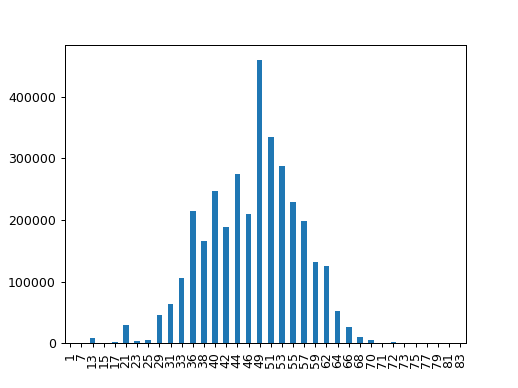

<AxesSubplot:>

In [25]:
count_by_grade.plot(kind='bar')

## Exercises

- At this point do the exercise "8. Plotting Ascent Data"

## Grouping Data - `df.groupby()`

- One of the most useful function in `pandas` is the `df.groupby()` method
- We can use this to aggregate data 
- Aggregation normally involves three parts:
    1. The column names that you are grouping by
    1. The column names we want to aggregate 
    1. The operation we want to use for aggregation
- We first try to find the max grade for each year
    1. The column name we want to group by is `year`
    1. The column name we want to aggregate is `grade_id`
    1. The operation we will apply is `max()`

<IPython.core.display.Javascript object>


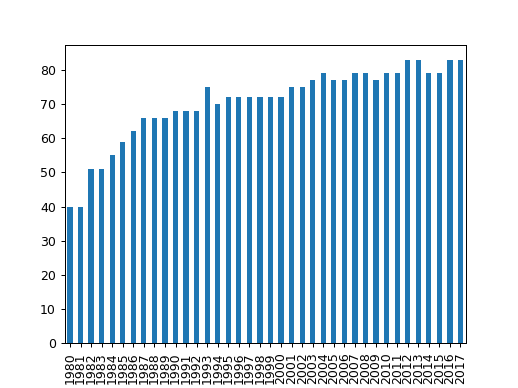

<AxesSubplot:xlabel='year'>

In [35]:
max_grade_by_year = df.groupby(['year'])['grade_id'].max().sort_index()

max_grade_by_year.plot(kind='bar')

- We can see how the maximum grade reached is increasing by year

## Data For Specific User

- We pick a random `user_id` and then plot the number of climbs they have done per year

<IPython.core.display.Javascript object>


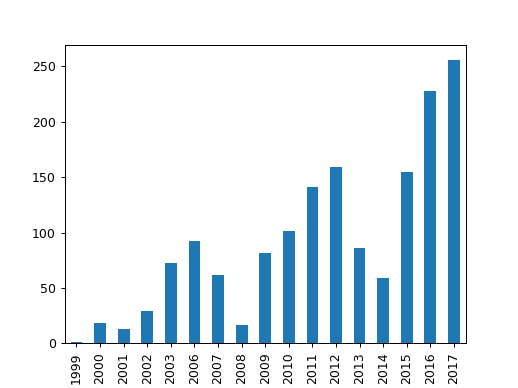

<AxesSubplot:>

In [43]:
random_user_id = 34623

df_random_user = df[df['user_id'] == random_user_id]['year'].value_counts().sort_index()

df_random_user.plot(kind='bar')

## Exercises

- At this point do the exercise "9. Random User Ascents"

## Average Grade For Number Of Years Climbed

- In this part, we will try to find the average grade for the number of years climbed per year
- First we need to find the "starting" year for each user, we do this using a groupby and use a special method called `.transform()`, this makes it easy for us to assign that information back into the dataframe
- We then want to have that information within the dataframe
- We then group by number of years climbed and take the mean value of the `grade_id`
- We can see below that on average the grade increases up till 15 years of climbing then seems to actually go down after

<IPython.core.display.Javascript object>


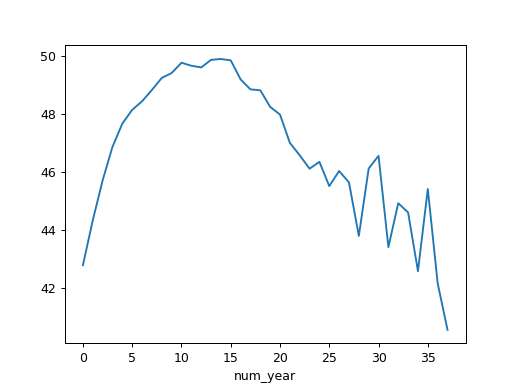

<AxesSubplot:xlabel='num_year'>

In [48]:
df['min_year'] = df.groupby('user_id')['year'].transform('min')
df['num_year'] = df['year'] - df['min_year']

df.groupby('num_year')['grade_id'].mean().plot()

## Joining Dataframes

- Another very important part of `pandas` is joining dataframes, similar to the way we would in SQL
- Something important to note is the the function to join is actually `pd.merge` and not `pd.join`
- It is important to understand the different parameters available for `pd.merge`
- We will do an example of joining `df_grade` onto first 1000 rows of `df_ascent`
- Below you can see all the additional columns joined on from `df_grade` onto `df_ascent`
- This is important as data will be stored in normalised form and we may want to do analysis by joining multiple tables together as certain information will only be available after joining the data

In [55]:
df_joined = pd.merge(
    left=df_ascent.head(1000),
    right=df_grade,
    how='left',
    left_on='grade_id',
    right_on='id',
)

display(df_joined)
display(df_joined.columns)

,id_x,user_id,grade_id,notes,raw_notes,method_id,climb_type,total_score,date,year,...,fra_routes_selector,fra_boulders,fra_boulders_input,fra_boulders_selector,usa_routes,usa_routes_input,usa_routes_selector,usa_boulders,usa_boulders_input,usa_boulders_selector
0,2,1,36,,0,3,0,545,918342000,1999,...,1,6A,1,1,5.10a,1,1,V3,1,1
1,3,1,36,,0,3,0,545,925509600,1999,...,1,6A,1,1,5.10a,1,1,V3,1,1
2,4,1,36,,0,3,0,545,933026400,1999,...,1,6A,1,1,5.10a,1,1,V3,1,1
3,5,1,36,,0,3,0,545,933026400,1999,...,1,6A,1,1,5.10a,1,1,V3,1,1
4,6,1,36,,0,3,0,545,933458400,1999,...,1,6A,1,1,5.10a,1,1,V3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1544,108,55,,0,1,0,850,958514400,2000,...,0,7B+,1,0,5.12c,1,1,V8/9,1,0
996,1545,108,57,,0,1,0,900,960760800,2000,...,1,7C,1,1,5.12d,1,0,V9,1,1
997,1546,108,59,,0,1,0,950,966290400,2000,...,0,7C+,1,0,5.13a,1,1,V10,1,0
998,1547,109,42,,0,1,1,550,962402400,2000,...,0,6B+,1,0,5.10d,1,0,V4/V5,1,0


Index(['id_x', 'user_id', 'grade_id', 'notes', 'raw_notes', 'method_id',
       'climb_type', 'total_score', 'date', 'year', 'last_year', 'rec_date',
       'project_ascent_date', 'name', 'crag_id', 'crag', 'sector_id', 'sector',
       'country', 'comment', 'rating', 'description', 'yellow_id', 'climb_try',
       'repeat', 'exclude_from_ranking', 'user_recommended', 'chipped', 'id_y',
       'score', 'fra_routes', 'fra_routes_input', 'fra_routes_selector',
       'fra_boulders', 'fra_boulders_input', 'fra_boulders_selector',
       'usa_routes', 'usa_routes_input', 'usa_routes_selector', 'usa_boulders',
       'usa_boulders_input', 'usa_boulders_selector'],
      dtype='object')

## Exercises

- At this point do the exercise "10. Joining Dataframes"